In [14]:
import sys
sys.path.append('../code')
import pandas as pd
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt
from krr import *

In [15]:
data_df = pd.read_csv("hmw3-data1.csv")
print(data_df)
x = np.array(data_df['x'])
y = np.array(data_df['y'])

pts = np.vstack((x, y)).T

   Unnamed: 0         x         y
0           1  0.000000 -0.314584
1           2  0.698132  0.756633
2           3  1.396263 -1.515888
3           4  2.094395 -0.813359
4           5  2.792527  0.096648
5           6  3.490659 -2.031149
6           7  4.188790 -1.422325
7           8  4.886922 -0.732797
8           9  5.585054 -2.258253
9          10  6.283185 -2.159256


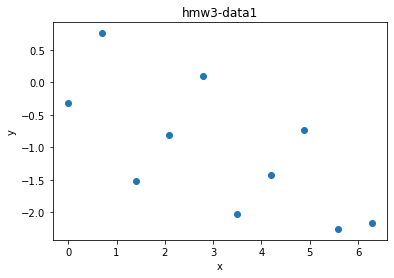

In [16]:
plt.figure()
plt.scatter(*pts.T)
plt.title('hmw3-data1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
k = lambda x, y: min(x,y)
K = kernel_mat(k, x)
X = np.vstack((x*x, x, np.ones(len(x)))).T
theta = np.zeros(3)
theta = theta[:, np.newaxis]
alpha = np.zeros(len(x))
alpha = alpha[:, np.newaxis]
y = y[:, np.newaxis]
l = 10

print(X)

[[ 0.          0.          1.        ]
 [ 0.48738787  0.6981317   1.        ]
 [ 1.94955149  1.3962634   1.        ]
 [ 4.38649084  2.0943951   1.        ]
 [ 7.79820595  2.7925268   1.        ]
 [12.18469679  3.4906585   1.        ]
 [17.54596338  4.1887902   1.        ]
 [23.88200571  4.88692191  1.        ]
 [31.19282379  5.58505361  1.        ]
 [39.4784176   6.28318531  1.        ]]


In [35]:
#alpha = (la.pinv(K.T @ K + l/2*(K + K.T)) @ K.T) @ (y - (X @ theta))
#theta = (la.pinv(X.T @ X) @ X.T) @ (y - K @ alpha)
Xt = X @ la.inv(X.T @ X) @ X.T
print(X @ la.inv(X.T @ X) @ X.T )
print(la.pinv(X.T @ X) @ X.T)
alpha = la.inv(-Xt @ K - Xt * l + K) @ (y - Xt @ y)

[[ 6.18181818e-01  3.81818182e-01  1.90909091e-01  4.54545455e-02
  -5.45454545e-02 -1.09090909e-01 -1.18181818e-01 -8.18181818e-02
  -2.22044605e-16  1.27272727e-01]
 [ 3.81818182e-01  2.78787879e-01  1.90909091e-01  1.18181818e-01
   6.06060606e-02  1.81818182e-02 -9.09090909e-03 -2.12121212e-02
  -1.81818182e-02  5.55111512e-16]
 [ 1.90909091e-01  1.90909091e-01  1.83333333e-01  1.68181818e-01
   1.45454545e-01  1.15151515e-01  7.72727273e-02  3.18181818e-02
  -2.12121212e-02 -8.18181818e-02]
 [ 4.54545455e-02  1.18181818e-01  1.68181818e-01  1.95454545e-01
   2.00000000e-01  1.81818182e-01  1.40909091e-01  7.72727273e-02
  -9.09090909e-03 -1.18181818e-01]
 [-5.45454545e-02  6.06060606e-02  1.45454545e-01  2.00000000e-01
   2.24242424e-01  2.18181818e-01  1.81818182e-01  1.15151515e-01
   1.81818182e-02 -1.09090909e-01]
 [-1.09090909e-01  1.81818182e-02  1.15151515e-01  1.81818182e-01
   2.18181818e-01  2.24242424e-01  2.00000000e-01  1.45454545e-01
   6.06060606e-02 -5.45454545e-02

In [19]:
theta = la.pinv(X.T @ X) @ X.T @ (y - K @ alpha)
print(theta)
print(alpha)

[[-0.03376621]
 [-0.08142941]
 [-0.31458357]]
[[-1.63940689]
 [ 4.74240398]
 [-4.30859201]
 [-0.34433639]
 [ 4.304187  ]
 [-3.96706683]
 [-0.16274608]
 [ 3.12558383]
 [-2.37400456]
 [ 0.62397794]]


In [20]:
def g(x, xp, alpha, k):
    total = 0
    for xi, ai in zip(xp, alpha):
        total += ai * k(x, xi)
    return total

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


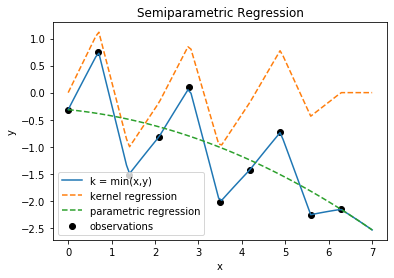

In [31]:
x_r =  np.linspace(0, 7, 100)
y_kr = np.array([g(xi, x, alpha, k) for xi in x_r])  
y_gr = np.array([xi*xi*theta[0] + xi*theta[1] + theta[2] for xi in x_r])  
y_r = np.array([g(xi, x, alpha, k) + xi*xi*theta[0] + xi*theta[1] + theta[2] for xi in x_r]) 

plt.figure()
plt.scatter(*pts.T, c='k', label='observations')
plt.plot(x_r, y_r, label='k = min(x,y)')
plt.plot(x_r, y_kr, '--', label='kernel regression')
plt.plot(x_r, y_gr, '--', label='parametric regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Semiparametric Regression')
plt.legend()
plt.savefig('semipara.eps')
plt.show()